## Springboard Capstone Project 1

## Airbnb New User Bookings

## Data collection

Datasets provided by Airbnb on Kaggle competition website. 
There are six data files:

train_users.csv - the training set of users

test_users.csv - the test set of users

sessions.csv - web sessions log for users

countries.csv - summary statistics of destination countries in this dataset and their locations

age_gender_bkts.csv - summary statistics of users' age group, gender, country of destination

sample_submission.csv - correct format for submitting your predictions

## Data wrangling

### Preliminary examination of the data

The training data consists of 213,451 rows x 16 columns 
while the test data has 62,096 rows x 15 columns with our target feature 'country_destination' being the additional column in the training set. 

We can immediately see that we have a substantial number of missing values for age.

In [2]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('ggplot')
%matplotlib inline

In [5]:
# Load the data into DataFrames
df_train = pd.read_csv('train_users_2.csv')
df_test = pd.read_csv('test_users.csv')
sessions = pd.read_csv('sessions.csv')
usergrp = pd.read_csv('age_gender_bkts.csv')
countries = pd.read_csv('countries.csv')

### user's age, gender data

In [7]:
usergrp = pd.read_csv('age_gender_bkts.csv')
usergrp.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [8]:
usergrp.isnull().values.any()

False

There's no missing values in the data file of age_gender_bkts.csv.

As the bin size is reasonably small, we can define a new feature, mean_age which can represent ages without too much loss of information. The mean_age will be the average of the upper and lower range for that particular bin.

In [9]:
#Convert 100+ into a bin.
usergrp['age_bucket'] = usergrp['age_bucket'].apply(lambda x: '100-104' if x == '100+' else x)
#Define mean_age feature
usergrp['mean_age'] = usergrp['age_bucket'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1]))/2)
usergrp = usergrp.drop('age_bucket', axis=1)
usergrp.head()

,country_destination,gender,population_in_thousands,year,mean_age
0,AU,male,1.0,2015.0,102.0
1,AU,male,9.0,2015.0,97.0
2,AU,male,47.0,2015.0,92.0
3,AU,male,118.0,2015.0,87.0
4,AU,male,199.0,2015.0,82.0


In [10]:
usergrp['country_destination'].value_counts()

GB    42
AU    42
PT    42
ES    42
US    42
IT    42
NL    42
CA    42
DE    42
FR    42
Name: country_destination, dtype: int64

In [11]:
usergrp['gender'].value_counts()

male      210
female    210
Name: gender, dtype: int64

### Country stats

In [17]:
countries = pd.read_csv('countries.csv')
countries

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


This is a really small dataset, and does not need cleaning. The statistics given here will have to be incorporated into our training and testing datasets before training our model and/or will have to be used in exploratory data analysis to come up with additional insights.

### sessions

In [19]:
sessions = pd.read_csv('sessions.csv')
sessions.head(15)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


In [20]:
sessions.shape

(10567737, 6)

We will replace the unknown values with NaN to give it some semantic meaning. We can always revert back to unknown should the need arise or should our EDA suggest that labelling unavailable data as unknown values will lead to better predictions.

In [21]:
sessions['action'] = sessions['action'].replace('-unknown-', np.nan)
sessions['action_type'] = sessions['action_type'].replace('-unknown-', np.nan)
sessions['action_detail'] = sessions['action_detail'].replace('-unknown-', np.nan)

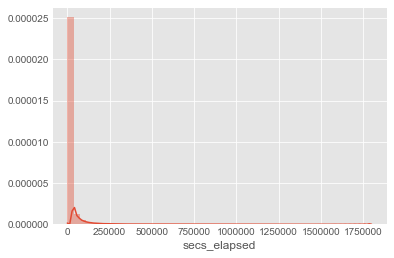

In [22]:
sns.distplot(sessions[sessions['secs_elapsed'].notnull()]['secs_elapsed'])

In [23]:
sessions['secs_elapsed'].describe()

count    1.043171e+07
mean     1.940581e+04
std      8.888424e+04
min      0.000000e+00
25%      2.290000e+02
50%      1.147000e+03
75%      8.444000e+03
max      1.799977e+06
Name: secs_elapsed, dtype: float64

The average number of seconds per session is 19405 seconds whereas the median value is 1147 seconds. This suggests a heavily skewed dataset with some outlier observations influencing the mean of the distribution.

In [24]:
len(sessions[sessions['secs_elapsed'].isnull()])

136031

There are more than 136,000 fields for which we do not know the value. We need to either drop or interpolate these values. For this case, let's fill the unavailable values with the median of the distribution. We use median since, as was mentioned earlier, this distribution is heavily influenced by outliers.

In [25]:
median_secs = sessions['secs_elapsed'].median()
sessions['secs_elapsed'] = sessions['secs_elapsed'].fillna(median_secs)

In [26]:
sessions['secs_elapsed'].describe()

count    1.056774e+07
mean     1.917078e+04
std      8.833430e+04
min      0.000000e+00
25%      2.370000e+02
50%      1.147000e+03
75%      8.193000e+03
max      1.799977e+06
Name: secs_elapsed, dtype: float64

As can be seen above, the interpolation has not significantly altered the summary statistics of the distribution. 
Therefore we are filling in the null values for this dataset.

In [27]:
null_action = sessions[(sessions['action_type'].isnull()) | (sessions['action_detail'].isnull()) | (sessions['action'].isnull()) ]
null_action.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


In [28]:
null_action.shape

(2237000, 6)

In [29]:
len(null_action['action'].drop_duplicates())

270

There are over 2.23 million fields that have incomplete information about the action, action type or action detail. This is approximately 20% of the data that we possess. Additionally, there are 270 types of action for which we have null values, so examining them one by one is simply not feasible manually. Since this is not our training dataset, we will not drop the values. We shall keep because it is possible to extract information even from rows which have null columns.

In [31]:
sessions[sessions['device_type'].isnull()]

,user_id,action,action_type,action_detail,device_type,secs_elapsed


In [32]:
sessions['device_type'] = sessions['device_type'].replace('-unknown-', np.nan)
sessions['device_type'].value_counts()

Mac Desktop                         3594286
Windows Desktop                     2658539
iPhone                              2105031
Android Phone                        839637
iPad Tablet                          683414
Android App Unknown Phone/Tablet     273652
Tablet                               139886
Linux Desktop                         28373
Chromebook                            22348
iPodtouch                              8198
Windows Phone                          2047
Blackberry                              979
Opera Phone                              68
Name: device_type, dtype: int64

As can be seen above, there are 13 types of devices that people are using. There is also certain activity for which we do not have data about the device. Let us check how many instances does that account for.


In [34]:
len(sessions[sessions['device_type'].isnull()])

211279

As with the action variables, we will not drop these values since this is not the dataset we will be applying our machine learning algorithms to. However, we will replace the unknown strings with NaN to give it more semantic meaning which might be useful in our analysis.

### Training and testing datasets

In [43]:
print("We have", df_train.shape[0], "users in the training set and", 
      df_test.shape[0], "in the test set.")
print("In total we have", df_train.shape[0] + df_test.shape[0], "users.")

We have 213451 users in the training set and 62096 in the test set.
In total we have 275547 users.


In [44]:
# training data
df_train.info()

# classification problem, no labels in test data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [45]:
# test data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
id                         62096 non-null object
date_account_created       62096 non-null object
timestamp_first_active     62096 non-null int64
date_first_booking         0 non-null float64
gender                     62096 non-null object
age                        33220 non-null float64
signup_method              62096 non-null object
signup_flow                62096 non-null int64
language                   62096 non-null object
affiliate_channel          62096 non-null object
affiliate_provider         62096 non-null object
first_affiliate_tracked    62076 non-null object
signup_app                 62096 non-null object
first_device_type          62096 non-null object
first_browser              62096 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 7.1+ MB


In [46]:
# Merge train and test users
users = pd.concat((df_train, df_test), axis=0, ignore_index=True)

# Remove ID's since now we are not interested in making predictions
users.drop('id',axis=1, inplace=True)

users.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,basic,20091208061105


In [47]:
# preview the train_users data
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [48]:
# preview the test_users data
df_test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


#### Missing data

The missing data comes in the way of NaN, but if we take a look at the DataFrame printed above we can see at the gender column some values being -unknown-. We first transform those values into NaN first. And we can see how much data we are missing. For this purpose let's compute the NaN percentage of each feature.

In [49]:
users.gender.replace('-unknown-', np.nan, inplace=True)
users_nan = (users.isnull().sum() / users.shape[0]) * 100
users_nan[users_nan > 0].drop('country_destination')

age                        42.412365
date_first_booking         67.733998
first_affiliate_tracked     2.208335
gender                     46.990169
dtype: float64

Because date_first_booking column has a lot of missing values, in this case, we do not need to building this model. 

We have quite a lot of NaN in the age and gender wich will yield in lesser performance of the classifiers we will build. The feature date_first_booking has a 58% of NaN values because this feature is not present at the tests users, and therefore, we won't need it at the modeling part.

In [50]:
print(int((df_train.date_first_booking.isnull().sum() / df_train.shape[0]) * 100), "% of missing values at date_first_booking in the training data")

58 % of missing values at date_first_booking in the training data


#### The other feature with a high rate of NaN was age. 

In [51]:
users.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

There is some inconsistency in the age of some users as we can see above. It could be because the age inpout field was not sanitized or there was some mistakes handlig the data.

In [52]:
print(sum(users.age > 120))
print(sum(users.age < 18))

830
188


#### and we have 830 users over 120 years old?

In [53]:
users[users.age > 120]['age'].describe()

count     830.000000
mean     2002.620482
std        94.201344
min       132.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

#### It's seems that the weird values are caused by the appearance of 2014. Maybe related with a wrong input being added with the new users??

In [55]:
users[users.age < 18]['age'].describe()

count    188.000000
mean      12.718085
std        5.764569
min        1.000000
25%        5.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: age, dtype: float64

The young users seems to be under an acceptable range being the 50% of those users above 16 years old. We will need to hande the outliers. The simple thing that came to my mind it's to set an acceptance range and put those out of it to NaN.

In [57]:
users.loc[users.age > 120, 'age'] = np.nan

# users.loc[users.age < 12, 'age'] = np.nan

The age data shows some interesting differentiation by country destination that could be useful. Users who book trips to Spain and Portugal tend to be younger while those that book trips to Great Britain tend to be older.

(10, 60)

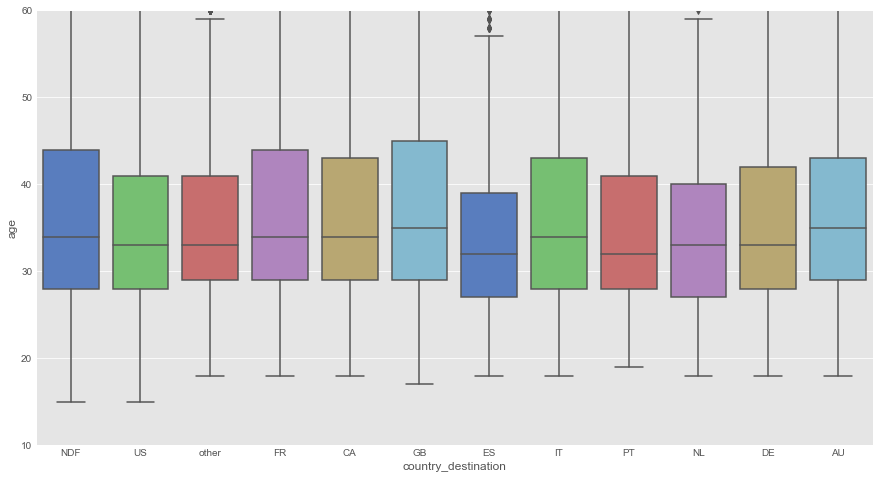

In [37]:
import seaborn as sns
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='country_destination', y='age', data=df_train, palette="muted", ax =ax)
ax.set_ylim([10, 60])

#### Cleaning training age data

The age data is a bit messy - there are many values in the order of thousands. We will try to make some reasonable assumptions and use this to clean it up. We establish a valid range of ages as (14, 100) and assume that any values between 1919 and 1995 are birth years. Any ages outside the valid range are set to NaN.

The age data also has a significant number of missing values. The plots below show the country destination proportions for users who have provided their age and for those where age is missing. Only 25% of users with missing ages book while 55% of users with age provided book. This suggests there is value to identifying users who have not provided age if, for example, we decide to impute missing ages. It could be that taking the step of providing age is a sign a user is more serious about making a booking.


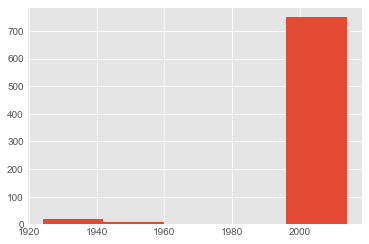

In [6]:
df_train[df_train.age > 1000].age.hist(bins=5)

The age data also has a significant number of missing values. The plots below show the country destination proportions for users who have provided their age and for those where age is missing. Only 25% of users with missing ages book while 55% of users with age provided book. This suggests there is value to identifying users who have not provided age if, for example, we decide to impute missing ages. It could be that taking the step of providing age is a sign a user is more serious about making a booking.

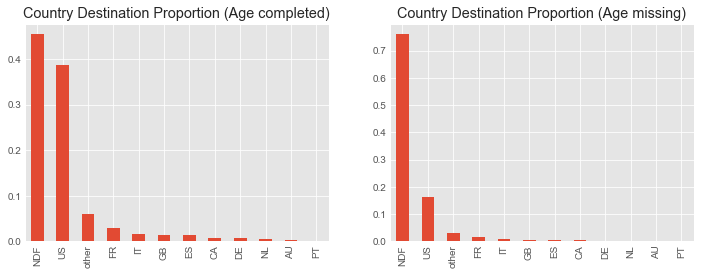

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
complete_age = df_train[df_train.age.notnull()].country_destination.value_counts()
missing_age = df_train[df_train.age.isnull()].country_destination.value_counts()
complete_age.div(complete_age.sum()).plot(kind='bar',title='Country Destination Proportion (Age completed)',ax=axes[0])
missing_age.div(missing_age.sum()).plot(kind='bar',title='Country Destination Proportion (Age missing)',ax=axes[1])

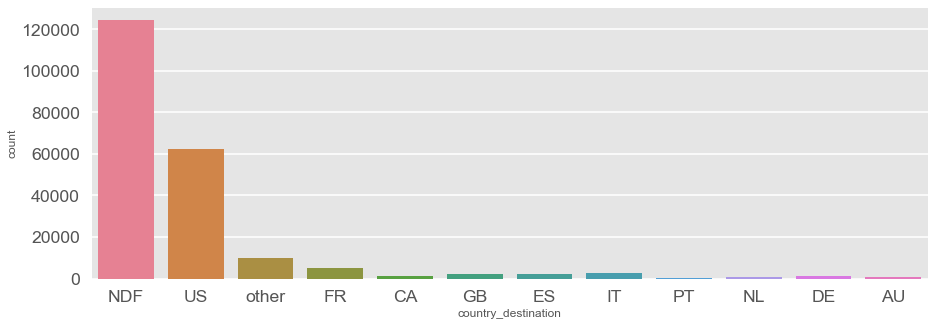

In [20]:
# country_destination

df_train['booked'] = (df_train['country_destination'] != 'NDF').astype(int)

# Plot the frequency for every country_destination value
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='country_destination', data=df_train, palette="husl", ax=axis1)

## Data Exploration

We begin by looking at the frequency of each class of our target feature, Country Destination. We know from the competition description that there should be 12 classes.

All 12 classes are represented in the training data and we can see that nearly 60% of users do not make a booking. Of the users that do book, about 70% do so in the US. We have rather imbalanced classes and will need to keep this in mind when training our model.



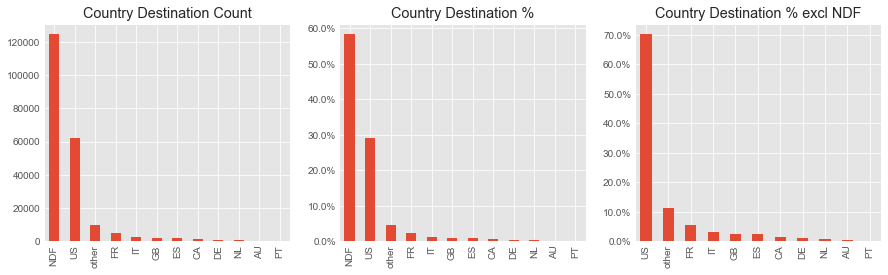

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15, 4))
country_counts = df_train.country_destination.value_counts()
country_counts.plot(kind='bar',title='Country Destination Count',ax=axes[0])
ax = country_counts.div(country_counts.sum()).plot(kind='bar',title='Country Destination %',ax=axes[1] )
ax.set_yticklabels(['{:3.1f}%'.format(x*100) for x in ax.get_yticks()])
booked_count = df_train[df_train.country_destination != 'NDF'].country_destination.value_counts()
ax1 = booked_count.div(booked_count.sum()).plot(kind='bar',title='Country Destination % excl NDF',ax=axes[2] )
ax1.set_yticklabels(['{:3.1f}%'.format(x*100) for x in ax1.get_yticks()])